In [7]:
import json
from pathlib import Path

# load generated, filtered and rejected qa data
generated_dir = Path("../data/generated")
filtered_dir = Path("../data/filtered")
rejected_dir = Path("../data/rejected")

# load the data
generated_qa = []
for file in generated_dir.glob("*.json"):
    with file.open("r") as f:
        generated_qa.extend(json.load(f))
        
filtered_qa = []
for file in filtered_dir.glob("*.json"):
    with file.open("r") as f:
        filtered_qa.extend(json.load(f))
        
rejected_qa = []
for file in rejected_dir.glob("*.json"):
    with file.open("r") as f:
        rejected_qa.extend(json.load(f))
        
assert len(generated_qa) == len(filtered_qa) + len(rejected_qa), "Data mismatch: generated data should equal filtered + rejected data"

In [9]:
metric_names = ['faithfulness', 'answer_relevancy', 'context_recall', 'context_precision']

# load metrics from the filtered + rejected data and show histograms
import matplotlib.pyplot as plt
import numpy as np
def load_metrics(qa_data):
    metrics = {name: [] for name in metric_names}
    for qa in qa_data:
        for name in metric_names:
            metrics[name].append(qa['metrics'][name])
    return metrics

metrics_filtered = load_metrics(filtered_qa + rejected_qa)

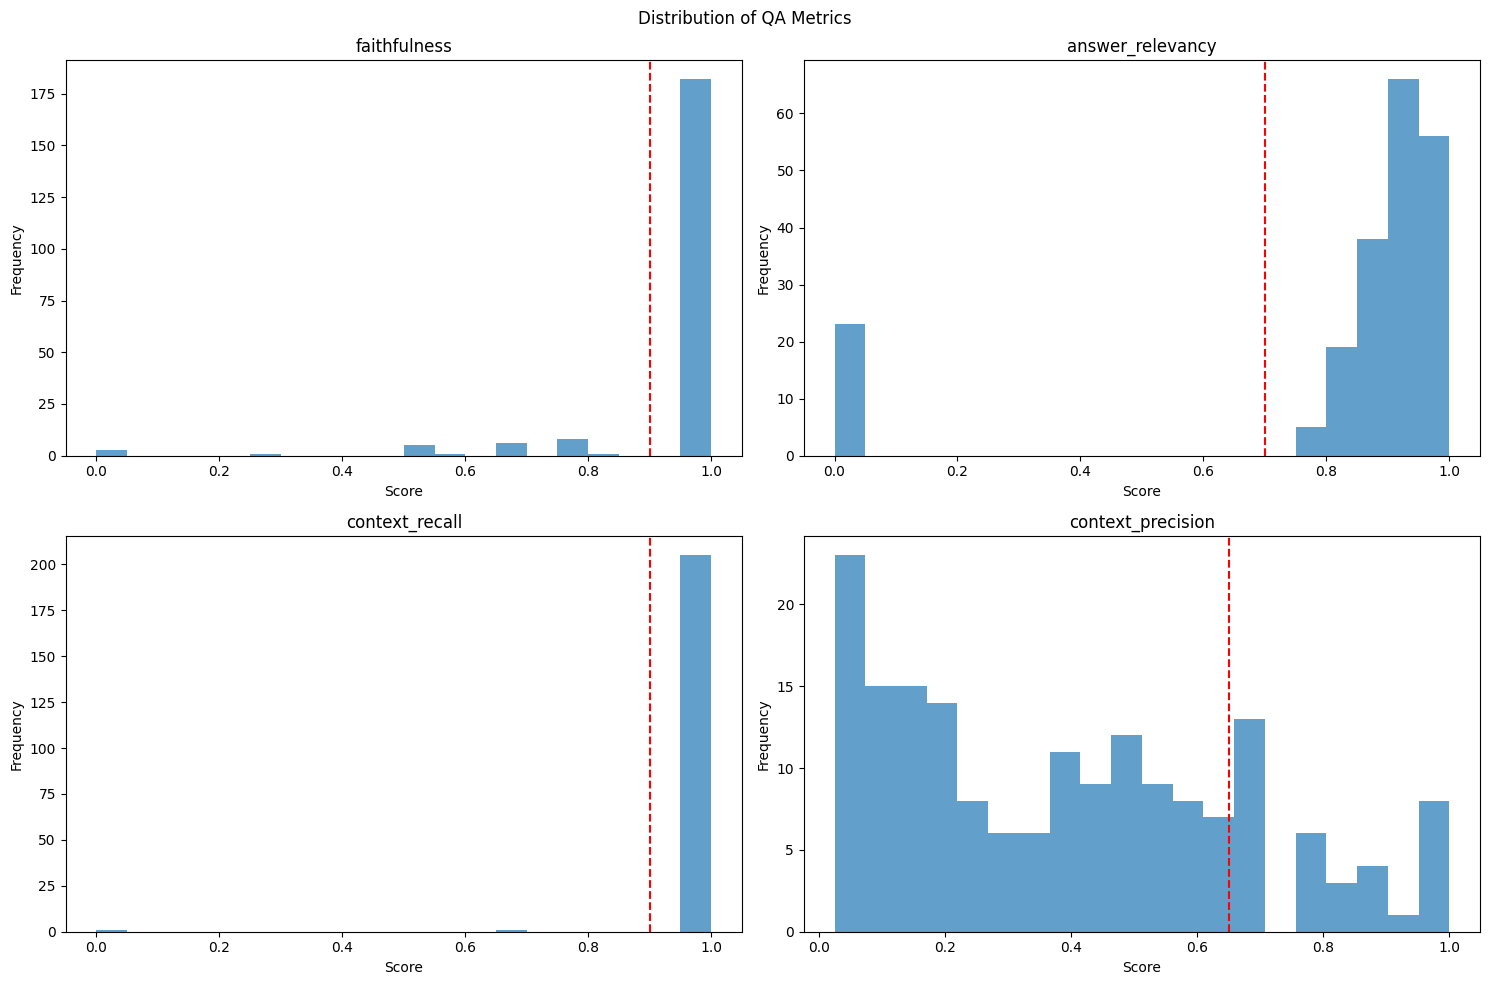

In [31]:
# plot histograms for each metric
def plot_metrics(metrics, title):
    plt.figure(figsize=(15, 10))
    for i, name in enumerate(metric_names):
        plt.subplot(2, 2, i + 1)
        plt.hist(metrics[name], bins=20, alpha=0.7)
        if name == 'answer_relevancy':
            plt.axvline(x=0.7, color='r', linestyle='--', label='Threshold (0.7)')
        elif name == 'context_precision':
            plt.axvline(x=0.65, color='r', linestyle='--', label='Threshold (0.65)')
        else:
            plt.axvline(x=0.9, color='r', linestyle='--', label='Threshold (0.9)')
        plt.title(name)
        plt.xlabel('Score')
        plt.ylabel('Frequency')
    plt.suptitle(title)
    plt.tight_layout()
    #plt.show()
    # save the plot
    plt.savefig(f"{title.replace(' ', '_').lower()}.png")
    
plot_metrics(metrics_filtered, "Distribution of QA Metrics")

In [29]:
# based on the following thresholds:
# context_recall >= 0.9
# context_precision >= 0.65
# faithfulness >= 0.9
# answer_relevancy >= 0.7
# we're left with the following number of filtered and rejected data

combined_qa = filtered_qa + rejected_qa
def filter_qa(qa_data):
    return [
        qa for qa in qa_data
        if (qa['metrics']['context_recall'] >= 0.9 and
            qa['metrics']['context_precision'] >= 0.65 and
            qa['metrics']['faithfulness'] >= 0.9 and
            qa['metrics']['answer_relevancy'] >= 0.7)
    ]
filtered_combined_qa = filter_qa(combined_qa)
print(f"Total QA pairs: {len(combined_qa)}")
print(f"Filtered QA pairs: {len(filtered_combined_qa)}")
# show percentage
percentage = len(filtered_combined_qa) / len(combined_qa) * 100
print(f"Percentage of filtered QA pairs: {percentage:.2f}%")

Total QA pairs: 292
Filtered QA pairs: 29
Percentage of filtered QA pairs: 9.93%
